# МЧА, осень 2019

## ИПР 6.  Метод конечных элементов для уравнения Пуассона.

*Примечание*. Материалы взяты из курса "Быстрые методы решения уравнений в частных производных", читавшегося группой научных вычислений в Сколковском институте науки и технологий весной 2015. Ниже приводится перевод на русский.

## МКЭ в одномерном случае:

* Рассмотрим область определения $\Omega = [0,1]$
* Сетка (результат триангуляции) ${\mathcal T}$ состоит из сегментов $[x_{i}, x_{i+1}]$ (где $x_0,...,x_N$ означают узлы)
<img src="fig/FEM_mesh_1D.png">

* Идея: материал состоит из базовых строительных блоков: треугольников, сегментов или тетраэдров.

* Возьмем кусочно линейные функции (точнее, кусочно аффинные) относительно $\mathcal T$:
$$
    u_h(x) = \sum_{i=1}^N c_i v_i(x)
$$
<img src="fig/FEM_basis_1D.png">

* Обозначим пространство функций как ${\mathcal P}^1(\mathcal T)$

* Зачастую будем использовать:
$$
\mathcal P^1_0(\mathcal T)
:=
\{u\in\mathcal P^1_0(\mathcal T) : u|_{\Omega} = 0 \}
$$

* Теперь мы можем перейти к дискретизации уравнения...

### Дискретизация уравнения (методом Галеркина):

Для начала нам надо переписать уравнение в вариационной форме.

#### Вариационная форма

* Рассмотрим уравнение Пуассона:
\\[
\begin{align*}
-\Delta u &= f
\\
u|_{\Gamma} &= 0
\end{align*}
\\]

* Умножим уравнение на функцию $v$ (называемую тестовой) такую, что $v|_{\Gamma}=0$ и проинтегрируем:
$$
-\int_{\Omega} (\Delta u) v
=- \int_{\Gamma} \nabla u v \cdot n + \int_{\Omega} \nabla u \cdot \nabla v
=\int_{\Omega} f v
\qquad\forall v
$$

* так как $v=0$ на границе, получаем
$$
\int_{\Omega} \nabla u \cdot \nabla v
=\int_{\Omega} f v
\qquad\forall v
$$
* Это уравнение называется **вариационной формой**

#### Случай граничных условий Неймана или смешанных граничных условий 

* Рассмотрим задачу
$$
\begin{align*}
-\Delta u &= f\qquad\text{для $\Omega$}
\\
u &= 0\qquad\text{для $\Gamma_1$}
\\
u_n &= 0\qquad\text{для $\Gamma_2$}
\end{align*}
$$
где $u_n$ - это производная по нормали $\Gamma_1 \cup\Gamma_2 = \partial\Omega$ (или нормальная производная).

* Необходимо ввести пространство функций $X = \{\text{функция }u : u|_{\Gamma_1}=0 \}$. Тогда для функции $v\in X$ имеем:
$$
-\int_{\Omega} \Delta u v
= - \int_{\Gamma_1} u_n v - \int_{\Gamma_2} u_n v + \int_{\Omega} \nabla u\cdot \nabla v
$$

* Магическим образом, первый интеграл =0 потому что $v=0$ на $\Gamma_1$ и второй интегра =0 потому что $u_n=0$ на $\Gamma_2$.

* **Получаем ту же вариационную задачу**, но с другим пространством функций

### Продолжим рассмотрения метода

* Обозначим $A(u,v) = \int_{\Omega} \nabla u\cdot\nabla v$ и $F(v) := \int_\Omega f v$.

* Получаем дискретные уравния:
\\[
A(u_h, v_h) = F(v_h)
\qquad \forall v_h\in \mathcal P^1_0(\mathcal T)
\\]
(И готово!)

* Чтобы имплементировать метод, нам нужно
$$
A(u_h, v_\ell) = F(v_\ell),
\qquad \ell=1,...,N-1
$$
(таким образом, в качестве тестовых функций достаточно использовать только базисные функции)

* Делаем подстановку $u_h = \sum_{k=1}^{N-1} c_k v_k$:
$$
\sum_{k=1}^{N-1} c_k A(v_k, v_\ell) = F(v_\ell) \qquad \ell=1,\ldots,N-1,
$$

* Следовательно, $A(v_k, v_\ell)$ есть элементы матрицы (называемую матрицей жесткости, **stiffness matrix**), и $F(v_\ell)$ есть компоненты вектора в правой части матричного уравнения.

* Таким образом, метод конечных элементов аналогичен методу Галеркина из ИРЛ 1.

* Остается только решить СЛАУ...

## МКЭ в 2D

* В двумерном случае сетка (или меш) состоит из треугольников
<img width="33%" src="fig/FEM_mesh_example.jpg">

    - Обычно, описывается 3 массивами:

    <tt>узлы:</tt> <br>
    $x_1$, $y_1$ <br>
    $x_2$, $y_2$ <br>
    ... <br>
    $x_N$, $y_N$ <br>
    (т.е., координаты первого узла $(x_1, y_1)$, и.т.д.)

    <tt>треугольники:</tt> <br>
    $n_1$, $n_2$, $n_3$ <br>
    $m_1$, $m_2$, $m_3$ <br>
    ... <br>
    (т.е., узлы $n_1$, $n_2$, $n_3$ являются вершинами первого треугольника, и.т.д.)

    <tt>грани:</tt> <br>
    $n_1$, $n_2$
    ... <br>
    (т.е., отрезок $n_1$, $n_2$ является первой гранью **границы области**, и.т.д. )

* Базисные функции имеют вид:

<img src="fig/FEM_basis_2D.png">  

### Сборка матрицы жесткости

Классический подход:

* Заметим, что $\nabla v_k$ является кусочно-линейной константой:
$$
A_{k,\ell}
= \int_{\Omega} \nabla v_k \nabla v_\ell
= \sum_{T\in\mathcal T} |T| (\nabla v_k|_T) (\nabla v_\ell|_T),
$$
где $|T|$ есть площадь (в общем случае, мера объема в n-мерном пространстве) $T$

* Тогда алгоритм имеет вид:
```
for k = 1 to n
  for l = 1 to n
    for all T
      if(k and l are nodes of T)
      // otherwise the integral is zero
        A(k,l) += |T|
           *(\nabla v_k|_T)
           *(\nabla v_l|_T)
```

* Обычно, циклы алгоритма меняют местами:
```
for all T
    for k, vertices of T
        for l, vertices of T
            A(k,l) += <<as before>>
```

* Преимущество: можно итерировать только по трем вершинам каждого треугольника
* Осталось только рассмотреть геометрию одного треугольника

<img src="fig/FEM_triangle.png">

* Имеем
$$
2 |T| = \det \left(
\begin{array}{cc}
x _2 - x _1 & y _2 - y _1 \\
x _3 - x _1 & y _3 - y _1 \\
\end{array}
\right)
$$
Пусть $n_1$, $n_2$, $n_3$ являются вершинами $T$. Обозначим $\eta_i := v_{n_i}$.
Легко показать:
$$
\nabla \eta _j = \frac{1}{2|T|}
\left(
\begin{array}{cc}
y _{j+1} - y _{j+2} \\
x _{j+2} - x _{j+1} \\
\end{array}
\right)
$$
Подразумевается, что $(x_4,y_4) = (x_1,y_1)$, $(x_5,y_5) = (x_2,y_2)$

* Можно показать, что оценкой матрицы $M_{j,k} = |T| (\nabla \eta_j)\cdot(\nabla \eta_k)$  является:
$$
M = \frac{|T|}{2} G G^T
\qquad\text{где}\qquad
G =
\left(
\begin{array}{ccc}
1 & 1 & 1 \\
x _1 & x _2 & x _3 \\
y _1 & y _2 & y _3
\end{array}
\right)^{-1}
\left(
\begin{array}{ccc}
0 & 0 \\
1 & 0 \\
0 & 1
\end{array}
\right)
$$

* Тогда псевдокод может быть переписан:
```
for all T
    calculate M
    for k=1..3
        for l=1..3
            A(triangles(k),triangles(l)) += M(k,l)
```

* Больше деталей <a href="http://www2.mathematik.hu-berlin.de/~cc/cc_homepage/download/1999-AJ_CC_FS-50_Lines_of_Matlab.pdf">Remarks around 50 lines of Matlab: short finite element
implementation</a>

### Сборка правой части (силы)

* Чтобы оценить силы и избежать точного интегрирования:
$$
\int_T f \eta_i
$$
можно приблизить
$$
\int_T f \eta_i \approx f(x_S, y_S) \int_\Omega \eta_i,
$$
где $(x_S,y_S)$ означает барицентр (или центр масс) треугольника.
Псевдокод для двумерного случая:
```
for all T
  calculate f(xS, yS)
  for k=1..3
    f(triangles(k)) += 1/3 * area(T) * f(xS, yS)
```

### Граничные условия

* Необходимо заполнить только "нужные" столбцы и строки матрицы жесткости, соответсвтующие "свободным узлам".

* **Свободные узлы** -- узлы не лежащие на границе $\Gamma_1$ для задачи
$$
\begin{align*}
-\Delta u &= 0\qquad\text{для $\Omega$}
\\
u &= 0\qquad\text{для $\Gamma_1$}
\\
u_n &= 0\qquad\text{для $\Gamma_2$}
\end{align*}
$$

* Тогда алгоритм имеем вид:
```
A = zero matrix for all nodes
for all T
    <<SAME>>
убрать столбцы и строки матрицы А, не соответствующие свободным узлам
```

* Алтернативно, можно **заменить** соответствующие строки и столбцы на:
$$
\begin{pmatrix}
\cdot & 0 & \cdot & \cdot \\
0 & 1 & 0 & 0\\
\cdot & 0 & \cdot & \cdot \\
\cdot & 0 & \cdot & \cdot \\
\end{pmatrix}
$$


## Преимущества/Недостатки метода конечных элементов

* Хорошо подходит для простой физики, сопромата.
* Хорошо соответствует принципам сохранения энергии, и другим косервативным принципам

Но...

* Не просто добиться стабильности для задач газо- и гидродинамики.
* иногда не монотонный.

# Задача
Рассмотрим уравнение Пуассона
$$
\begin{align*}
-\Delta u &= 1\qquad\text{on $\Omega$}
\\
u &= 0\qquad\text{on $\Gamma$}
\end{align*}
$$
где $\Omega = B_1(0,0)\setminus B_{0.3}(0.7,0)$, $B_r(x,y)$ есть круг радиуса $r$ с центром в $(x,y)$. Данное уравненение описывает распределение потока жидкости в трубе под давлением и является частью математической модели добычи нефти.

Задача: посчитать $\int_{\Omega} u$ используя метод конечных элементов.

Большинство генераторов сеток не смогу построить сетку на данной области, поэтому рассмотрите регионы $\Omega_1 = B_1(0,0)\setminus B_{0.3}(0.7-2\epsilon,0)$ и $\Omega_2 = B_1(0,0)\setminus B_{0.3}(0.7-\epsilon,0)$ и покажите что полученные решения (или интегралы решений) близки друг к другу для малых $\epsilon$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import meshpy.triangle as triangle
import scipy.sparse as sps
from scipy.sparse.linalg import spsolve
from scipy.interpolate import griddata

## Шаг 1. Постройте сеть.

Можно сделать либо с помощью MeshPy, либо загрузив данные [файлы](https://github.com/oseledets/fastpde/tree/master/Mesh_guide).

Инструкция к MeshPy и функции, которые читают подготовленный файл сетки можно найти [тут](http://nbviewer.ipython.org/github/oseledets/fastpde/blob/master/Mesh_guide/Mesh.ipynb).

In [2]:
def read_dat(f):
    if type(f) is str:
            f = open(f, 'r')
    points = []
    n_points = int(f.readline())
    #print f.readline()
    for i in range(n_points):
        pp = f.readline().split(' ')
        points.append([float(pp[0]),float(pp[1])])
    n_tris = int(f.readline())
    tris = []
    for i in range(n_tris):
        tt = f.readline().split(' ')
        tris.append([int(tt[0]),int(tt[1]),int(tt[2])])
    facets = []
    n_facets = int(f.readline())
    for i in range(n_facets):
        ff = f.readline().split(' ')
        facets.append((int(ff[0]),int(ff[1])))
        
    return np.array(points), np.array(tris),np.array(facets)

def write_dat(mesh,f):
    facets = np.array(mesh.facets)
    if type(f) is str:
            f = open(f, 'w')
    mesh_points = np.array(mesh.points)
    mesh_tris = np.array(mesh.elements)
    p_count = mesh_points.shape[0]
    t_count = mesh_tris.shape[0]
    f_count = len(facets)
    f.write(str(p_count))    
    f.write('\n') 
    for i in range(p_count):
        f.write(str(mesh_points[i][0]))
        f.write(' ')
        f.write(str(mesh_points[i][1]))
        f.write('\n') 
    f.write(str(t_count))
    f.write('\n')
    for i in range(t_count):
        f.write(str(mesh_tris[i][0]))
        f.write(' ')
        f.write(str(mesh_tris[i][1]))
        f.write(' ')
        f.write(str(mesh_tris[i][2]))
        f.write('\n')  
    f.write(str(f_count))
    f.write('\n')
    for i in range(f_count):
        f.write(str(facets[i][0]))
        f.write(' ')
        f.write(str(facets[i][1]))
        f.write('\n')
            

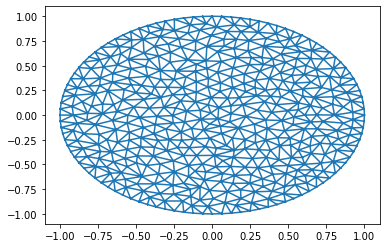

In [18]:
def round_trip_connect(start, end):
    result = []
    for i in range(start, end):
        result.append((i, i + 1))
    result.append((end, start))
    return result

#     circle=[r,x,y]
def create_mesh(circle, filename, _circle=None):
    info = triangle.MeshInfo()
    
    r, x, y = circle
    points = []
    points.extend(
        (r*np.cos(angle) + x,  (r*np.sin(angle)) + y)
        for angle in np.linspace(0, 2*np.pi, 100, endpoint=False))
    
    facets = round_trip_connect(0, len(points) - 1)
    
    if _circle:
        circ_start = len(points)
        _r, _x, _y = _circle
        points.extend(
            (_r*np.cos(angle) + _x,  (_r*np.sin(angle)) + _y) 
            for angle in np.linspace(0, 2*np.pi, 100, endpoint=False))
        facets.extend(round_trip_connect(circ_start, len(points)-1))
        info.set_holes([(_x, _y)])
        
        
    info.set_points(points)
    info.set_facets(facets)
    
    mesh = triangle.build(info, max_volume=6e-3, min_angle=25)
    write_dat(mesh, filename)  

def plot_mesh(filename):
    mp, mt, mf = read_dat(filename)
    plt.triplot(mp[:, 0], mp[:, 1], mt)
    plt.show()
    
create_mesh([1, 0, 0], 'task1.dat')
plot_mesh('task1.dat')

## Шаг 2. Составьте матрицу жесткости
* Напишите функцию, которая составляет $3\times 3$ матрицу $M$ для заданного треугольника
$$M = \frac{|T|}{2} G G^T,
\qquad\text{где}\qquad
G =
\left(
\begin{array}{ccc}
1 & 1 & 1 \\
x_1 & x_2 & x_3 \\
y_1 & y_2 & y_3
\end{array}
\right)^{-1}
\left(
\begin{array}{ccc}
0 & 0 \\
1 & 0 \\
0 & 1
\end{array}
\right),
$$
и |T| - площадь треугольника:
$$
2 |T| = \det \left(
\begin{array}{cc}
x _2 - x _1 & y _2 - y _1 \\
x _3 - x _1 & y _3 - y _1 \\
\end{array}
\right),
$$
(подробнее [лекция 4](http://nbviewer.ipython.org/github/oseledets/fastpde/blob/master/lecture-4.ipynb)).
* В цикле по всем треугольникам соберите матрицу жеcткости.
<!---
```
for all T
    calculate M
    for k=1..3
        for l=1..3
            A[triangles[k], triangles[l]] += M[k, l]
```
-->

* Поправьте строки и столбцы, соответствующие условию Дирихле

**Примечание:** используйте $\verb|scipy.sparse|$ для работы с разреженными матрицами. Обратите внимание, что lil - это единственный формат $\verb|scipy.sparse|$ который позволяет менять элементы разреженной матрицы после создания.

In [19]:
def get_points_for_triangle(points, triangle):
    return np.array([points[triangle[0]], points[triangle[1]],points[triangle[2]]])

def calculate_area(points):
    matrix = np.array([
        [points[1,0] - points[0,0], points[1,1] - points[0,1]],
        [points[2,0] - points[0,0], points[2,1] - points[0,1]]
    ])
    return np.linalg.det(matrix) / 2

def calculate_M(points):
    G_a = np.array([[1, 1, 1],points[:,0],points[:,1],])
    G_b = np.array([[0, 0],[1, 0],[0, 1],])
    G = np.linalg.inv(G_a) @ G_b
    T = calculate_area(points)
    return T * G @ G.T

def calculate_A(points, tris, facets):
    A = sps.lil_matrix((len(points), len(points)))
    for triangle in tris:
        M = calculate_M(get_points_for_triangle(points, triangle))
        for k in range(3):
            for l in range(3):
                A[triangle[k], triangle[l]] += M[k, l]
                
    for p, _ in facets:
        A[:, p] = 0
        A[p, :] = 0
        A[p, p] = 1
    
    return A.tocsc()

## Шаг 3. Создайте правую часть уравнения

Правая часть уравнения для $i$-го узла сети: $$f_i = \int_\Omega f \eta_i d\Omega .$$
Чтобы собрать правую часть пройдите все узлы в цикле и посчитайте $$ \int_T f \eta_i.$$ Можно использовать апроксимацию $$ \int_T f \eta_i \approx f(x_S, y_S) \int_\Omega \eta_i, $$ где $(x_S,y_S)$ обозначает центр масс треугольника. Подробнее см. [лекцию 4](http://nbviewer.ipython.org/github/oseledets/fastpde/blob/master/lecture-4.ipynb). 

**Примечание:** не забудьте обнулить правую часть для узлов соответствующих условию Дирихле.

In [20]:
def calculate_B(points, tris, facets):
    B = np.zeros(len(points))
    for triangle in tris:
        area = calculate_area(get_points_for_triangle(points, triangle))
        for p in triangle:
            B[p] += 1/3 * area * 1
    
    for p, _ in facets:
        B[p] = 0
    
    return B

## Шаг 4. Проверьте свой код
Проверьте, что свое решения, зная, что на области $\Omega = B_1(0,0)$ решение уравнения
$$
\begin{align*}
-\Delta u &= 1\qquad\text{on $\Omega$}
\\
u &= 0\qquad\text{on $\Gamma$}
\end{align*}
$$
имеет вид 
$$
u = \frac{1-x^2 - y^2}{4}
$$
**Примечание:** Проилюстрировать решение можно используя следующий код
```
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
xi = np.linspace(-1, 1, 200) 
yi = np.linspace(-1, 1, 200) 
z = mlab.griddata(points[:, 0], points[:, 1], sol, xi, yi)
plt.contourf(xi, yi, z)
plt.colorbar()
```

In [21]:
def plot_result(points, values):
    _x = np.linspace(-1, 1, 200) 
    _y = np.linspace(-1, 1, 200) 
    X, Y = np.meshgrid(_x, _y)
    Z = griddata(points, values, (X, Y), method='linear')
#     plt.contourf(X, Y, Z, cmap=plt.cm.coolwarm)
    plt.contourf(X, Y, Z, cmap='Blues')
    plt.colorbar()
    plt.show()
    
def solve(filename):
    points, tris, facets = read_dat(filename)
    A = calculate_A(points, tris, facets)
    B = calculate_B(points, tris, facets)
    return points, spsolve(A, B)

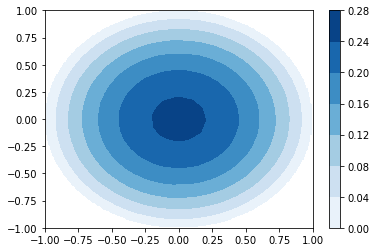

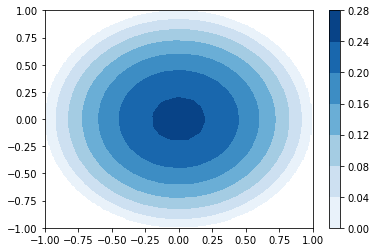

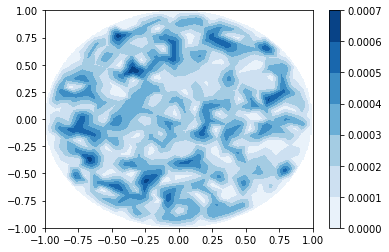

In [22]:
create_mesh([1, 0, 0], 'task4.dat')
points, sol = solve('task4.dat')
plot_result(points, sol)

def u (x, y):
    return (1 - x**2 - y**2) / 4
plot_result(points, u(points[:,0], points[:, 1]))

plot_result(points, np.abs(sol - np.array(u(points[:,0], points[:, 1]))))

## Шаг 5. Решите задачу для заданного региона.
Рассмотрите регионы $\Omega_1 = B_1(0,0)\setminus B_{0.3}(0.7-2\epsilon,0)$ и $\Omega_2 = B_1(0,0)\setminus B_{0.3}(0.7-\epsilon,0)$ и покажите что полученные решения (или интегралы решений) близки друг к другу для малых $\epsilon$.

In [30]:
def calculate_integral(filename, sol):
    points, tris, _ = read_dat(filename)
    result = 0
    for triangle in tris:
        area = calculate_area(get_points_for_triangle(points, triangle))
        for p in triangle:
            result += 1/3 * area * sol[p]
    return result

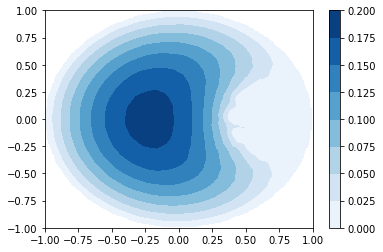

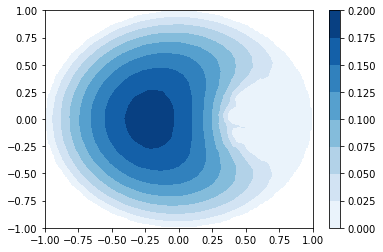

0.24603757524459563 0.24632873528096674 0.0002911600363711131


In [31]:
eps = 0.001
create_mesh([1, 0, 0], 'task5_1.dat', _circle=[0.3, 0.7 - 2*eps, 0])
points1, sol1 = solve('task5_1.dat')
plot_result(points1, sol1)

create_mesh([1, 0, 0], 'task5_2.dat', _circle=[0.3, 0.7 - eps, 0])
points2, sol2 = solve('task5_2.dat')
plot_result(points2, sol2)

int1 = calculate_integral('task5_1.dat', sol1)
int2 = calculate_integral('task5_2.dat', sol2)
print(int1, int2, abs(int1-int2))

## Шаг 6. Посчитайте поток жидкости
* Посчитайте поток жидкости для области $\int_{\Omega} u\, d \Omega$ in $B_1(0,0)\setminus B_{0.3}(0.7,0)$ и $B_1(0,0)\setminus B_{0.3}(0.5,0)$. Какой из них больше?

**Примечание:** $\int_{\Omega} u\, d \Omega$ не просто сумма всех элементов вектора решения, так как $u(x,y) \approx \sum с_i \eta_i(x,y)$.

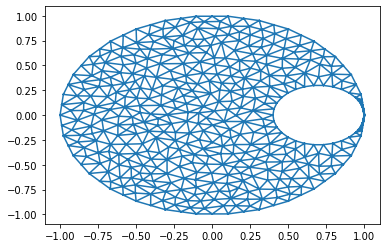

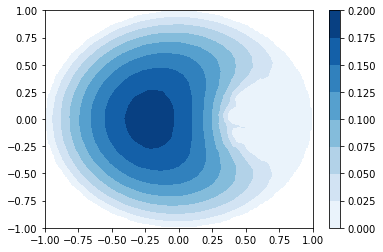

0.24632873528096674

In [32]:
eps = 0.001
create_mesh([1, 0, 0], 'task6_1.dat', _circle=[0.3, 0.7 - eps, 0])
plot_mesh('task6_1.dat')
points, sol = solve('task6_1.dat')
plot_result(points, sol)
calculate_integral('task6_1.dat', sol)

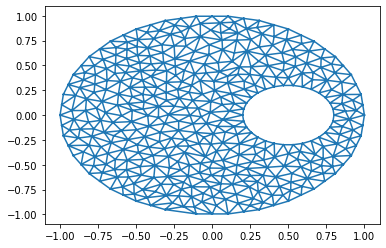

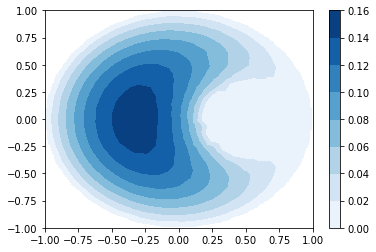

0.1883708724375163

In [33]:
create_mesh([1, 0, 0], 'task6_2.dat', _circle=[0.3, 0.5, 0])
plot_mesh('task6_2.dat')
points, sol = solve('task6_2.dat')
plot_result(points, sol)
calculate_integral('task6_2.dat', sol)